<a href="https://colab.research.google.com/github/Xuli2317/CIS104-project/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Data_Visualization_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web scraping

> import ไลบรารีต่าง ๆ ที่ใช้ในการทำงานกับข้อมูลและการพล็อตกราฟใน Python : pandas, numpy, requests, BeautifulSoup, matplotlib

In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

> เพิ่มฟอนต์ TH Sarabun New เข้าไปใน Font Manager ของ Matplotlib และกำหนดฟอนต์ที่ใช้ใน Matplotlib เป็น TH Sarabun New เนื่องจากหากไม่โหลดกราฟที่ได้ออกมา ภาษาจะเป็น [][][][][][][][]

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2023-11-26 18:47:41--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-11-26 18:47:42--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.2’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2023-11-26 18:47:42 (6.34 MB/s) - 

> ดึงข้อมูลจาก web page โดย


```
https://sgulyano.github.io/eval/95860997.html #วิชา DRI ปี 2563
https://sgulyano.github.io/eval/19689783.html #วิชา DRI ปี 2561
https://sgulyano.github.io/eval/94026030.html #วิชา YRY ปี 2563
https://sgulyano.github.io/eval/41557226.html #วิชา YRY ปี 2561
```





In [ ]:
main_url = 'https://sgulyano.github.io/eval/'

html_url = ['95860997.html', #DRI2563
            '19689783.html', #DRI2561
             '94026030.html', #YRY2563
             '41557226.html' #YRY2561
             ]
eval_url = [main_url + url for url in html_url]

> **get_table_data** ฟังก์ชันใช้ในการดึงข้อมูลจากตาราง โดยใน HTML ข้อมูลในตารางจะมีลักษณะดังนี้
เนื้อหาในตารางจะอยู่ใน tag tbody
ข้อมูลแต่ละแถวจะอยู่ใน tag tr
ข้อมูลแต่ละคอลัมน์อยู่ใน tag td
ใช้ฟังก์ชัน find_all เพื่อค้นหา tag ทั้งหมด และนำมาเป็นไว้ใน list


In [ ]:
def get_table_data(item):
    data = []
    table_body = item.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele]) # Get rid of empty values
    return data

> สร้าง list เอามาเก็บตัวแปร โดย all_info เก็บข้อมูลตรงส่วนหัวของตาราง และ all_ratings เก็บข้อมูลในตาราง \
ใช้ for loop ในการเปิด html โดย ใช้คำสั่ง requests.get เพื่อดึงข้อมูลเว็บไซต์ \
แปลงเป็น BeautifulSoup object ซึ่งจะทำหน้าที่เป็นตัวแทนข้อมูลบนเว็บ \
ใช้ find_all เพื่อค้นหาทุกแท็ก 'table' ในเว็บไซต์ \
ใช้ append กับ ฟังชั่น get_table_data โดย tables[0] เก็บไว้ใน all_info และ tables[2] เก็บไว้ใน all_ratings

In [ ]:
all_info = []
all_ratings = []

for url in eval_url:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    tables = soup.find_all("table")

    all_info.append(get_table_data(tables[0]))
    all_ratings.append(get_table_data(tables[2]))

---


จากข้อมูลทั้งหมด พวกเราสนใจข้อมูลผลสำรวจความพึงพอใจของนักศึกษาต่อรายวิชา DRI970 ในปี 2561 และ 2563 ว่านักศึกษาจะมีความพึงพอใจในปีไหนมากกว่ากัน โดยได้ใช้คะแนนผลรวมทั้งหมดที่อยู่ในรูปร้อยละมาเปรียบเทียบ

# เปรียบเทียบผลรวมทั้งหมดของรายวิชา DRI970 ระหว่างปี 2561 และ 2563

**ขั้นตอนบันทึกไฟล์ html เป็น csv**

***DRI970 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[0](คือข้อมูลของ DRI ปี 2563) \
 [31:] (คือแถวข้อมูลที่ต้องการใช้) \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563

In [ ]:
df_ratings = pd.DataFrame(all_ratings[0][31:])

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings.columns = new_column_names

df_ratings.to_csv('DRI2563.csv')

***DRI970 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา DRI ปี 2561 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[1] (คือข้อมูลของ DRI ปี 2561) \
  [31:] (คือแถวข้อมูลที่ต้องการใช้) \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2561



In [ ]:
df_ratings = pd.DataFrame(all_ratings[1][31:])

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings.columns = new_column_names

df_ratings.to_csv('DRI2561.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ DRI2563.csv, DRI2561.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['DRI2563.csv', 'DRI2561.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_df = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_df['ปีการศึกษา'] = new_columns
result_df = result_df[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนของวิชา DRI970 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง**  โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละผลรวมทั้งหมดของการประเมินการเรียนการสอนรายวิชา DRI970 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา DRI970**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20


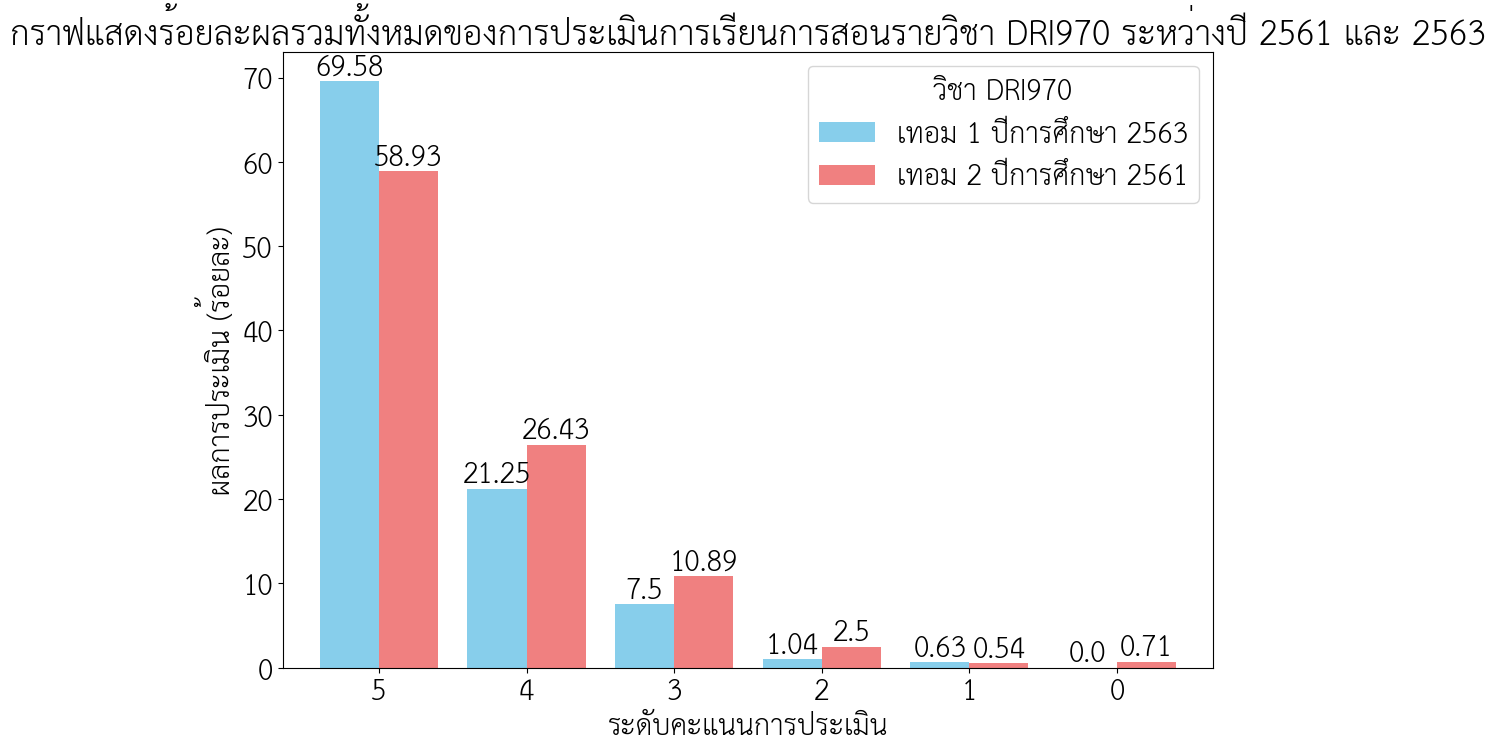

In [ ]:
result_df.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_df.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละผลรวมทั้งหมดของการประเมินการเรียนการสอนรายวิชา DRI970 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา DRI970')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()

> จากกราฟจะเห็นได้ว่าคะแนนการประเมินการเรียนการสอนของปี 2563 (สี skyblue) มีคะแนนสูงกว่าปี 2561 (สี lightcoral) โดยสังเกตจากระดับ 5 คะแนนซึ่งมีคะแนนสูงกว่าอย่าเห็นได้ชัด ผลการประเมินการเรียนการสอนนี้อาจบอกได้ว่าในปี 2563 มีการเรียนการสอนที่ดีกว่า หรือทำให้นักศึกษามีความรู้ความเข้าใจมากกว่าปี 2561



---


เนื่องจากกราฟแรกแสดงให้เห็นว่าปี 2563 ดีกว่าปี 2561 พวกเราจึงอยากทราบว่าเหตุใดปี
2563 ถึงได้ระดับการประเมินสูงกว่า จึงได้ทำกราฟแสดงผลการประเมินการเรียนของวิชา DRI970 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมของ 3 ส่วน ได้แก่ \
**ส่วนที่่ 1** ข้อคำถามกลางของมหาวิทยาลัย ซึ่งเป็นหัวข้อเกี่ยวกับระบบการสอน\
**ส่วนที่ 2** ข้อคำถามของคณะ/หน่วยงาน ซึ่งเป็นหัวข้อเกี่ยวกับผู้สอน\
**ส่วนที่ 3** สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ ซึ่งเป็นหัวข้อเกี่ยวกับอุปกรณ์การสอน

# เปรียบเทียบผลรวมส่วนที่ 1 : คำถามของมหาวิทยาลัยของรายวิชา DRI970 ระหว่างปี 2561 และ 2563

**ขั้นตอนบันทึกไฟล์ html เป็น csv**

***DRI970 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \  
[12] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_1

In [ ]:
df_ratings_1 = pd.DataFrame(all_ratings[0][12])
df_ratings_1 = df_ratings_1.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_1.columns = new_column_names

df_ratings_1.to_csv('DRI2563_1.csv')

***DRI970 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \  
[12] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_1



In [ ]:
df_ratings_1 = pd.DataFrame(all_ratings[1][12])
df_ratings_1 = df_ratings_1.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_1.columns = new_column_names

df_ratings_1.to_csv('DRI2561_1.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ DRI2563_1.csv, DRI2561_1.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['DRI2563_1.csv', 'DRI2561_1.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_df1 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_df1['ปีการศึกษา'] = new_columns
result_df1 = result_df1[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 1 ของวิชา DRI970 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 1 รายวิชา DRI970 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา DRI970**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

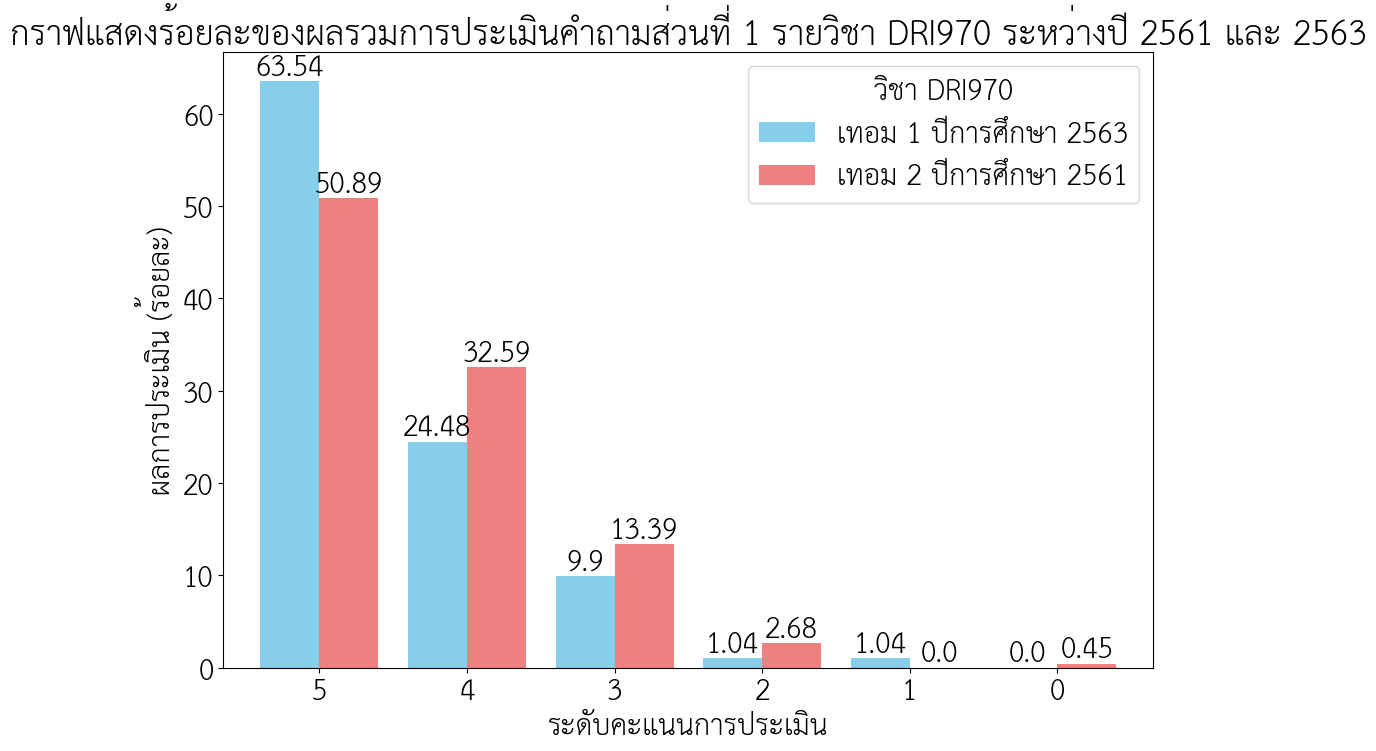

In [ ]:
result_df1.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_df1.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 1 รายวิชา DRI970 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา DRI970')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่าผลคะแนนการประเมินจะคล้าย ๆ กับกราฟผลรวมทั้งหมด แสดงให้เห็นว่าคะแนนในปี 2563 มากกว่า 2561 อยู่ถึง 12.65% ในส่วนที่ 1 คำถามเป็นคำถามจากมหาวิทยาลัยเกี่ยวกับการเรียนการสอนโดยรวมของรายวิชา และคะแนนส่วนนี้เป็นส่วนที่ทำให้คะแนนผลรวมทั้งของการประเมินในปี 2563 มากกว่าปี 2561 (ผลการประเมินส่วนที่ 1 บอกว่าได้การเรียนการสอนปี 2563 ดีว่าปี 2561)

# เปรียบเทียบผลรวมส่วนที่ 2 : ข้อคำถามของคณะ/หน่วยงานของรายวิชา DRI970 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***DRI970 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \  
[23] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_2

In [ ]:
df_ratings_2 = pd.DataFrame(all_ratings[0][23])
df_ratings_2 = df_ratings_2.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_2.columns = new_column_names

df_ratings_2.to_csv('DRI2563_2.csv')

***DRI970 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \   
[23] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_2



In [ ]:
df_ratings_2 = pd.DataFrame(all_ratings[1][23])
df_ratings_2 = df_ratings_2.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_2.columns = new_column_names

df_ratings_2.to_csv('DRI2561_2.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ DRI2563_2.csv, DRI2561_2.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['DRI2563_2.csv', 'DRI2561_2.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_df2 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_df2['ปีการศึกษา'] = new_columns
result_df2 = result_df2[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 2 ของวิชา DRI970 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 2 รายวิชา DRI970 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา DRI970**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20


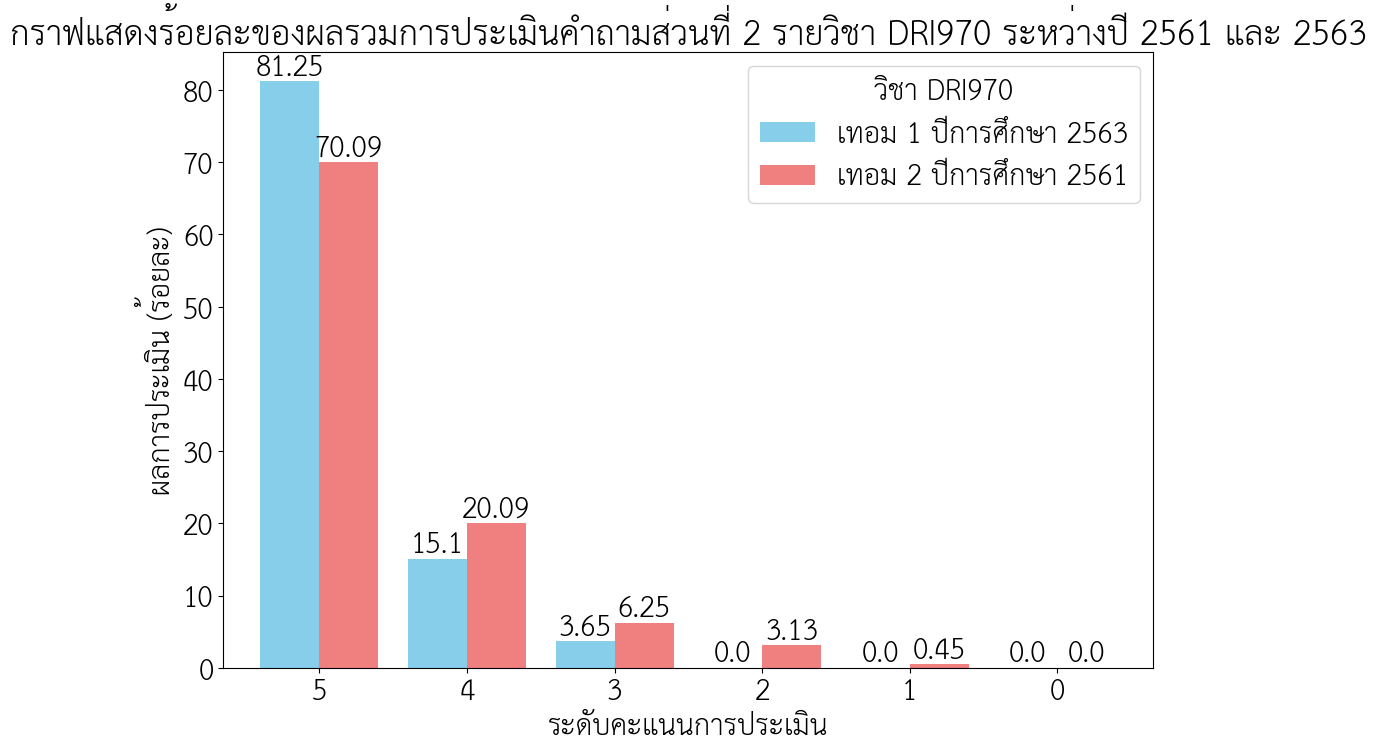

In [ ]:
result_df2.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_df2.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 2 รายวิชา DRI970 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา DRI970')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่า คะแนนการประเมินปี 2563 มากกว่าปี 2561 เช่นกัน (เป็นส่วนที่ทำให้คะแนนผลรวมทั้งหมดในปี 2563 มากกว่าปี 2561) ซึ่งส่วนที่ 2 นี้เป็นส่วนสำคัญเพราะเป็นคำถามเกี่ยวการเรียนการสอนของรายวิชาโดยตรง จากผลคะแนนส่วนนี้ทำให้ชี้ชัดว่าการเรียนการสอนในปี 2563 ดีกว่าปี 2561 เพราะคะแนนปี 2563 มากกว่าปี 2561 ถึง 11.16%

# เปรียบเทียบผลรวมส่วนที่ 3 : สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ของรายวิชา DRI970 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***DRI970 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \
[30] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_3

In [ ]:
df_ratings_3 = pd.DataFrame(all_ratings[0][30])
df_ratings_3 = df_ratings_3.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_3.columns = new_column_names

df_ratings_3.to_csv('DRI2563_3.csv')

***DRI970 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา DRI ปี 2563 จึงเลือกสร้าง DataFrame โดยเลือก all_ratings[0] (คือข้อมูลของ DRI ปี 2563) \  
[30] (คือแถวข้อมูลที่ต้องการใช้ \
ใช้คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ DRI2563_3



In [ ]:
df_ratings_3 = pd.DataFrame(all_ratings[1][30])
df_ratings_3 = df_ratings_3.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratings_3.columns = new_column_names

df_ratings_3.to_csv('DRI2561_3.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ DRI2563_2.csv, DRI2561_2.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['DRI2563_3.csv', 'DRI2561_3.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_df3 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_df3['ปีการศึกษา'] = new_columns
result_df3 = result_df3[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 3 ของวิชา DRI970 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 3 รายวิชา DRI970 ระหว่างปี 2561 และ 2563
*   กำหนดชื่อแกน x คือ ระดับคะแนนการประเมิน
*   กำหนดชื่อแกน y คือ ผลการประเมิน (ร้อยละ)
*   กำหนดคำอธิบายแกน คือ **วิชา DRI970**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

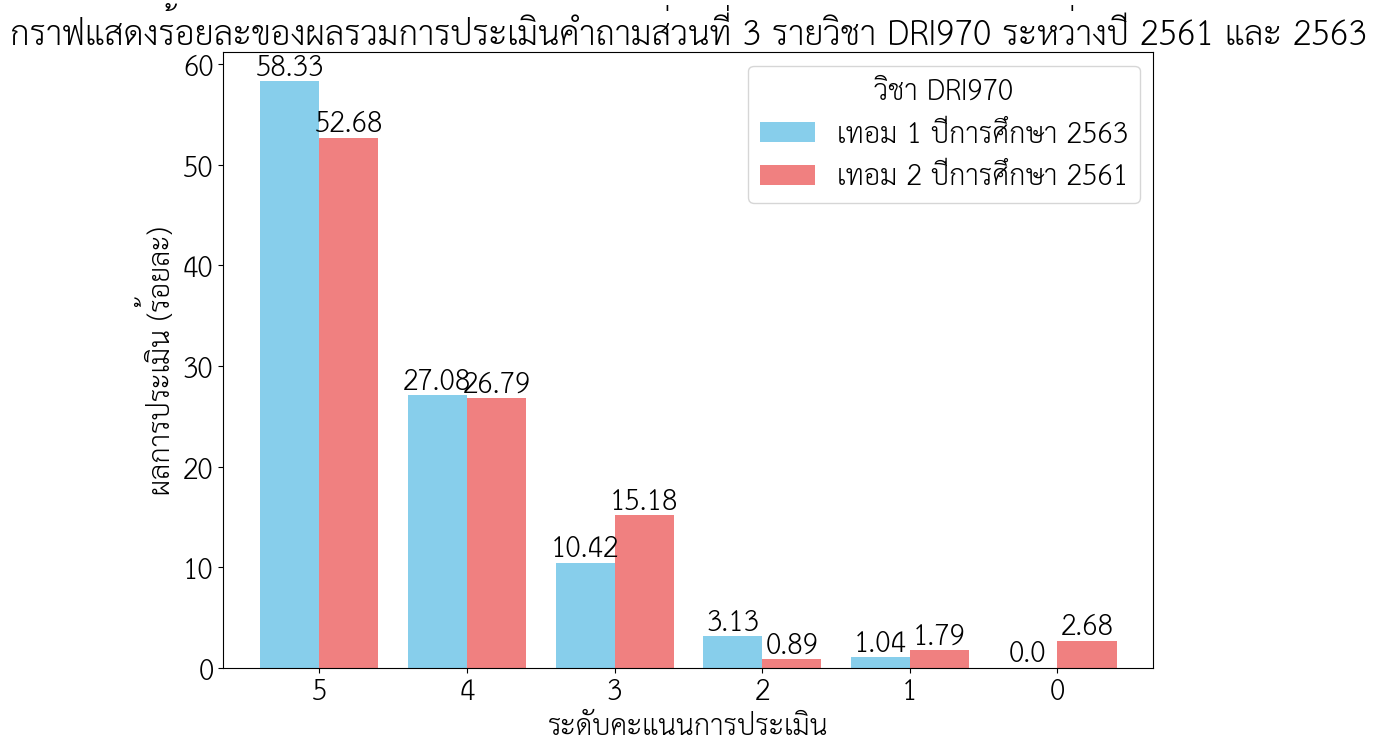

In [ ]:
result_df3.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_df3.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 3 รายวิชา DRI970 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา DRI970')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่ายังคงเป็นคะแนนในปี 2563 ที่มากกว่าปี 2561 ส่วนที่ 3 นี้เป็นคำถามเกี่ยวโสตทัศนอุปกรณ์ ซึ่งอาจจะไม่สำคัญมากนักแต่ก็เป็นส่วนที่ทำให้คะแนนในปี 2563 มากว่าปี 2561 เช่นกัน

**ดังนั้นสรุปได้ว่า** จากผลรวมทั้งหมดของการประเมินการเรียนการสอนในรายวิชา DRI970 ของปี 2561 และปี 2563จะเห็นได้ว่าปี 2563 มีคะแนนการประเมินมากกว่าปี 2561 ซึ่งคำถามจะแบ่งเป็นสามส่วน คะแนนปี 2563 ส่วนมากจากคำถามส่วนที่ 1และส่วนที่ 2 ซึ่งเป็นคำถามเกี่ยวกับการเรียนการสอนโดยตรง ดังนั้นสามารถสรุปได้ว่าการเรียนการสอนในปี 2563 ดีกว่า หรือทำให้นักศึกษามีความรู้ความเข้าใจมากกว่า ปี 2561



---


เมื่อพิจารณาจากทั้ง 3 กราฟจะเห็นได้ว่าปี 2563 นักศึกษาได้ประเมินพึงพอใจมากกว่า ปี 2561 พวกเราจึงสงสัยว่าในวิชาอื่นของปี 2563 นักศึกษาได้ประเมินพึงพอใจมากกว่าปี 2561 แบบวิชา DRI970 หรือไม่ จึงได้เลือกวิชา YRY790 มาทำกราฟอีกวิชาหนึ่ง

# เปรียบเทียบผลรวมทั้งหมดของรายวิชา YRY790 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***YRY790 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา YRY ปี 2563 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[0] (คือข้อมูลของ YRY ปี 2563) \
 [31:] (คือแถวข้อมูลที่ต้องการใช้) \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2563

In [ ]:
df_ratingsy = pd.DataFrame(all_ratings[2][31:])

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy.columns = new_column_names

df_ratingsy.to_csv('YRY2563.csv')

***YRY790 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา YRY ปี 2561 จึงเลือกสร้าง DataFrame \
โดยเลือก all_ratings[1] (คือข้อมูลของ YRY ปี 2561) \
 [31:] (คือแถวข้อมูลที่ต้องการใช้) \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2561



In [ ]:
df_ratingsy = pd.DataFrame(all_ratings[3][31:])

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy.columns = new_column_names

df_ratingsy.to_csv('YRY2561.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ YRY2563.csv, YRY2561.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['YRY2563.csv', 'YRY2561.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_dfy = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_dfy['ปีการศึกษา'] = new_columns
result_dfy = result_dfy[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนของวิชา YRY7901 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามรายวิชา YRY7901 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา YRY790**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

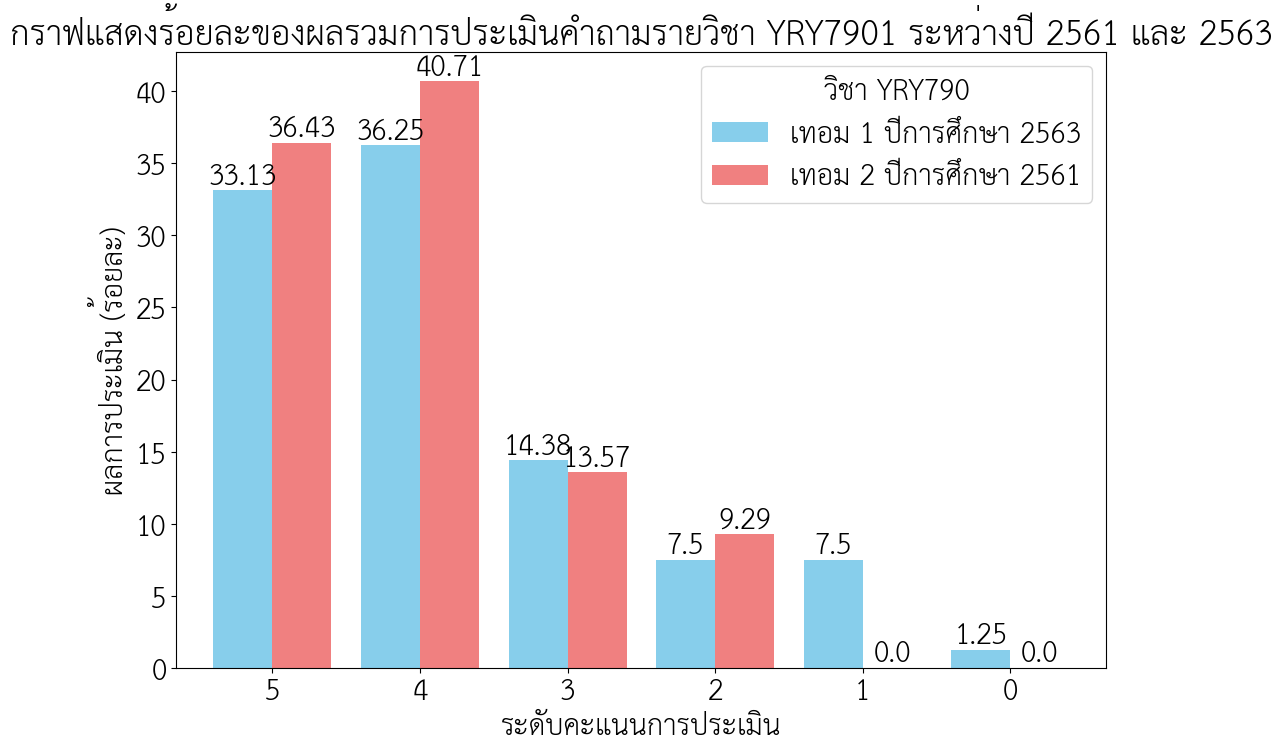

In [ ]:
result_dfy.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_dfy.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามรายวิชา YRY7901 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา YRY790')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()

> จากกราฟจะเห็นได้ว่าคะแนนการประเมินการเรียนการสอนของปี 2561 มีคะแนนสูงกว่าปี 2563 (อยู่3.3%) โดยสังเกตจากระดับ 5 คะแนนซึ่งมีคะแนนสูงกว่าเล็กน้อย ผลการประเมินการเรียนการสอนนี้อาจบอกได้ว่าในปี 2561 มีการเรียนการสอนที่ดีกว่า หรือทำให้นักศึกษามีความรู้ความเข้าใจมากกว่าปี 2563

# เปรียบเทียบผลรวมส่วนที่ 1 : คำถามของมหาวิทยาลัยของรายวิชา YRY790 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***YRY790 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา YRY ปี 2563 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[0] (คือข้อมูลของ YRY ปี 2563) \
 [12] (คือแถวข้อมูลที่ต้องการใช้) \
 ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \(คือแถวข้อมูลที่ต้องการใช้) \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2563_1

In [ ]:
df_ratingsy1 = pd.DataFrame(all_ratings[2][12])
df_ratingsy1 = df_ratingsy1.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy1.columns = new_column_names

df_ratingsy1.to_csv('YRY2563_1.csv')

***YRY790 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา YRY ปี 2561 จึงเลือกสร้าง DataFrame \
โดยเลือก all_ratings[1] (คือข้อมูลของ YRY ปี 2561) \
[12] (คือแถวข้อมูลที่ต้องการใช้) \
ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2561_1



In [ ]:
df_ratingsy1 = pd.DataFrame(all_ratings[3][12])
df_ratingsy1 = df_ratingsy1.transpose()

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy1.columns = new_column_names

df_ratingsy1.to_csv('YRY2561_1.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ YRY2563_1.csv, YRY2561_1.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['YRY2563_1.csv', 'YRY2561_1.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_dfy1 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_dfy1['ปีการศึกษา'] = new_columns
result_dfy1 = result_dfy1[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 1 ของวิชา YRY7901 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 1 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา YRY790**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

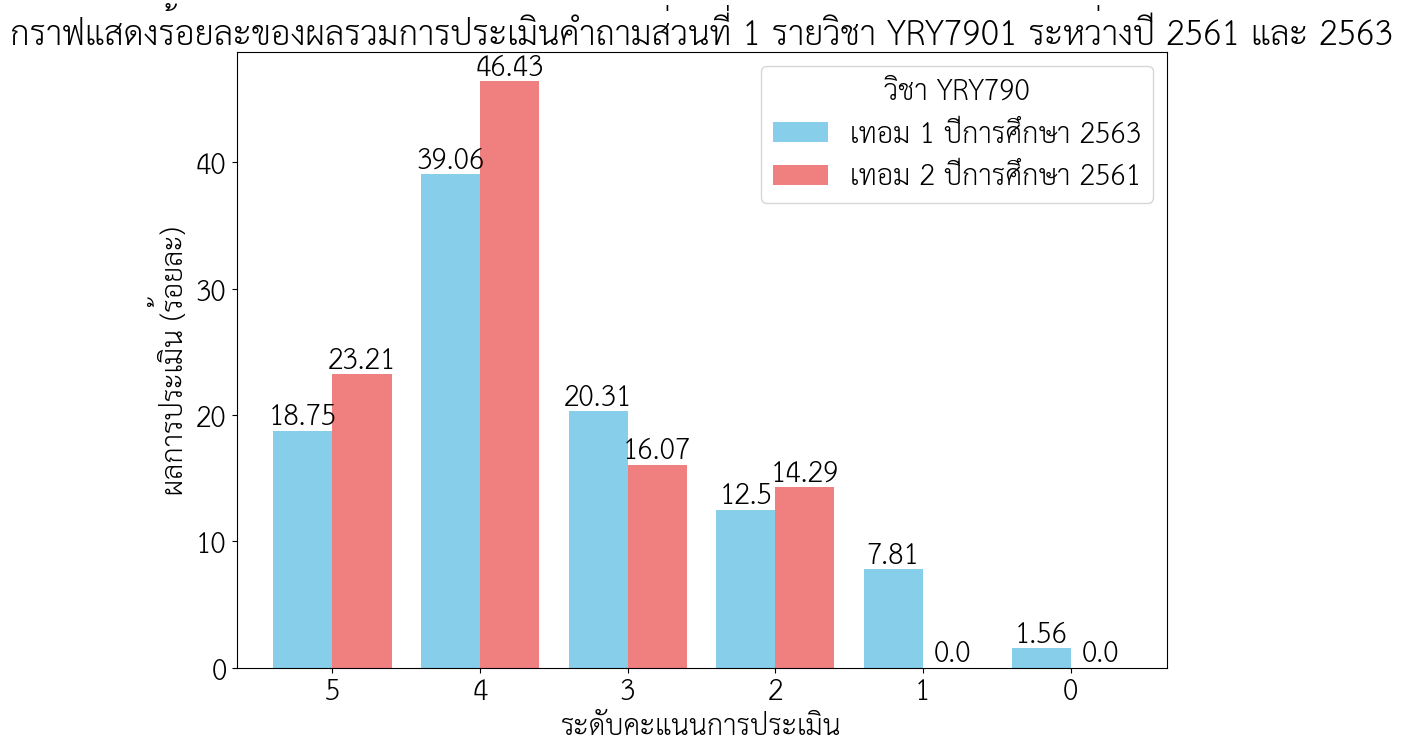

In [ ]:
result_dfy1.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_dfy1.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 1 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา YRY790')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่าผลคะแนนการประเมินจะคล้ายๆกับกราฟผลรวมทั้งหมด แสดงให้เห็นว่าคะแนนในปี 2561 มากกว่าปี 2563 (อยู่4.46%) ในส่วนที่ 1 คำถามเป็นคำถามจากมหาวิทยาลัยเกี่ยวกับการเรียนการสอนโดยรวมของรายวิชา และคะแนนส่วนนี้เป็นส่วนที่ทำให้คะแนนผลรวมทั้งของการประเมินในปี 2561 มากกว่าปี 2563 (ผลการประเมินส่วนที่1บอกว่าได้การเรียนการสอนปี 2563 ดีว่าปี 2561)

# เปรียบเทียบผลรวมส่วนที่ 2 : ข้อคำถามของคณะ/หน่วยงานของรายวิชา YRY790 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***YRY790 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา YRY ปี 2563 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[2] (คือข้อมูลของ YRY ปี 2563) \
 [23] (คือแถวข้อมูลที่ต้องการใช้) \
 ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2563_2

In [ ]:
df_ratingsy2 = pd.DataFrame(all_ratings[2][23])
df_ratingsy2 = df_ratingsy2.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy2.columns = new_column_names

df_ratingsy2.to_csv('YRY2563_2.csv')

***YRY790 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา YRY ปี 2561 จึงเลือกสร้าง DataFrame \
โดยเลือก all_ratings[3] (คือข้อมูลของ YRY ปี 2561) \
 [23] (คือแถวข้อมูลที่ต้องการใช้) \
ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2561_2



In [ ]:
df_ratingsy1 = pd.DataFrame(all_ratings[3][23])
df_ratingsy1 = df_ratingsy1.transpose()

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy1.columns = new_column_names

df_ratingsy1.to_csv('YRY2561_2.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ YRY2563_2.csv, YRY2561_2.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['YRY2563_2.csv', 'YRY2561_2.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_dfy2 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_dfy2['ปีการศึกษา'] = new_columns
result_dfy2 = result_dfy2[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]

**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 2 ของวิชา YRY7901 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 2 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา YRY790**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

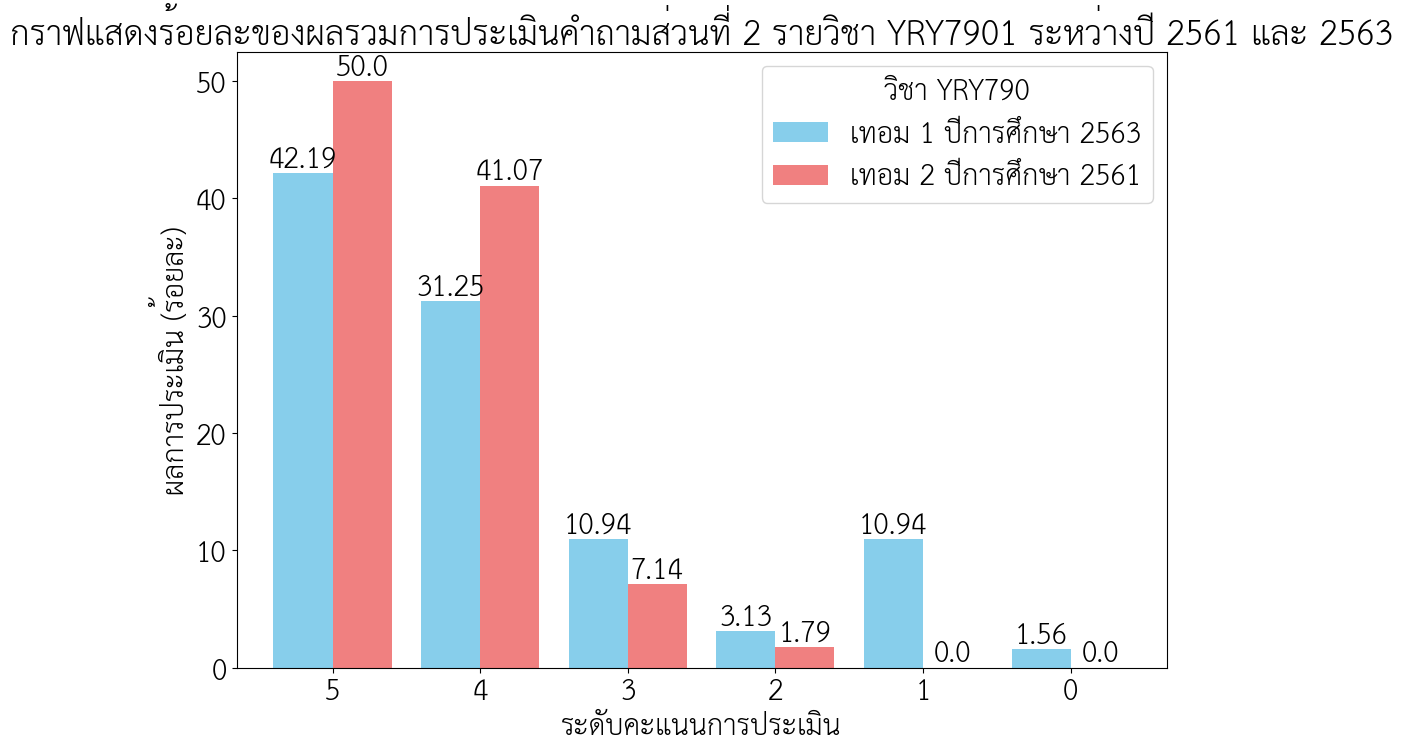

In [ ]:
result_dfy2.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_dfy2.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 2 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา YRY790')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่า คะแนนการประเมินปี 2561 มากกว่าปี 2563 เช่นกัน (เป็นส่วนที่ทำให้คะแนนผลรวมทั้งหมดในปี 2563 มากกว่าปี 2561) ซึ่งส่วนที่ 2 นี้เป็นส่วนสำคัญเพราะเป็นคำถามเกี่ยวการเรียนการสอนของรายวิชาโดยตรง จากผลคะแนนส่วนนี้ทำให้ชี้ชัดว่าการเรียนการสอนในปี 2561 มากกว่าปี 2563 เพราะคะแนนปี 2563 มากกว่าปี 2561 ถึง 7.81%

# เปรียบเทียบผลรวมส่วนที่ 3 : สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ของรายวิชา YRY790 ระหว่างปี 2561 และ 2563

 **ขั้นตอนเซฟไฟล์ html เป็น csv**

***YRY790 ปี 2563 เทอมที่ 1***


> เนื่องจากเป็นวิชา YRY ปี 2563 จึงเลือกสร้าง DataFrame \
 โดยเลือก all_ratings[2] (คือข้อมูลของ YRY ปี 2563) \
 [30] (คือแถวข้อมูลที่ต้องการใช้) \
 ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2563_3

In [ ]:
df_ratingsy3 = pd.DataFrame(all_ratings[2][30])
df_ratingsy3 = df_ratingsy3.transpose()
new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy3.columns = new_column_names

df_ratingsy3.to_csv('YRY2563_3.csv')

***YRY790 ปี 2561 เทอมที่ 2***


> เนื่องจากเป็นวิชา YRY ปี 2561 จึงเลือกสร้าง DataFrame \
โดยเลือก all_ratings[3] (คือข้อมูลของ YRY ปี 2561) \
 [30] (คือแถวข้อมูลที่ต้องการใช้) \
ใช้ คำสั่ง transpose() เพื่อทำคอลลัมม์เป็นแนวนอน เนื่องจากที่ได้ออกมาเป็นแนวตั้ง \
ดำเนินการเปลี่ยนชื่อคอลลัมม์ทั้ง 15 คอลลัมม์
บันทึก DataFrame ลงในไฟล์ CSV ที่ชื่อ YRY2561_3



In [ ]:
df_ratingsy3 = pd.DataFrame(all_ratings[3][30])
df_ratingsy3 = df_ratingsy3.transpose()

new_column_names = ['ข้อคำถาม', 'ประเมิน5', '5', 'ประเมิน4', '4', 'ประเมิน3', '3', 'ประเมิน2', '2', 'ประเมิน1', '1', 'ประเมิน0', '0', 'X-Bar', 'SD']
df_ratingsy3.columns = new_column_names

df_ratingsy3.to_csv('YRY2561_3.csv')

**ขั้นตอนแก้ไข DataFrame**
*   ระบุชื่อไฟล์ CSV ที่ต้องการอ่านและประมวลผลนั้นคือ YRY2563_3.csv, YRY2561_3.csv
*   สร้างลิสต์ dfs เพื่อเก็บ DataFrame ที่ได้จากการอ่านไฟล์ CSV
*   ทำการวนลูปผ่านลิสต์ของชื่อไฟล์ CSV และสร้าง DataFrame เฉพาะคอลัมน์ที่ต้องการ เพิ่มลงในลิสต์ ได้แก่คอลลัมม์ที่ได้ทำการเปลี่ยนชื่อในขั้นตอนที่แล้วคือ '5', '4', '3', '2', '1', '0'
*   รวม DataFrame ทั้งหมดในลิสต์เข้าด้วยกันในแนวแกน 0 (แนวแถว)
*   จะสร้างคอลลัมม์มาเพิ่มอีก 1 คอลลัมม์เพื่อเป็นคอลลัมม์ที่บอกความแตกต่างของข้อมูลแต่ละแถว โดยสร้างตัวแปร (new_columns) มาเก็บ 'เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561'
*   สร้างลิสต์ของชื่อ ปีการศึกษา เก็บตัวแปร เพิ่มคอลัมน์ลงใน DataFrame
โดยขั้นตอนนี้จะได้ DataFrame เฉพาะคอลัมน์ที่ต้องการได้แก่ ปีการศึกษา และตัวเลข 5-0 ที่เป็นคอลลัมน์คะแนนความพึงพอที่นักศึกษาประเมิน



In [ ]:
file_names = ['YRY2563_3.csv', 'YRY2561_3.csv']
dfs = []

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df = df[['ข้อคำถาม','5', '4', '3', '2', '1', '0']]
    dfs.append(df)
result_dfy3 = pd.concat(dfs, axis=0)

new_columns = ['เทอม 1 ปีการศึกษา 2563', 'เทอม 2 ปีการศึกษา 2561']
result_dfy3['ปีการศึกษา'] = new_columns
result_dfy3 = result_dfy3[['ปีการศึกษา', '5', '4', '3', '2', '1', '0']]
result_dfy3

,ปีการศึกษา,5,4,3,2,1,0
0,เทอม 1 ปีการศึกษา 2563,43.75,40.63,9.38,6.25,0.0,0.0
0,เทอม 2 ปีการศึกษา 2561,35.71,28.57,21.43,14.29,0.0,0.0


**ขั้นตอนพล็อตกราฟ** \
ใช้ไลบรารี Matplotlib เพื่อสร้างกราฟแท่ง (bar chart) **เพื่อแสดงผลการประเมินการเรียนการสอนส่วนที่ 3 ของวิชา YRY7901 ในระหว่างปี 2561 และ 2563 โดยแสดงผลตามระดับคะแนนการประเมินในรูปแบบของร้อยละของผลรวมทั้งหมด และมีการเพิ่มข้อความบนแต่ละแท่งเพื่อแสดงค่าสูงสุดของแต่ละแท่ง** โดยมีขั้นตอนดังนี้
*   กำหนดคอลัมน์ 'ปีการศึกษา' เป็น index ของ DataFrame
*   สร้าง Figure และ Axes สำหรับการวาดกราฟขนาด 12x8 นิ้ว
*   กำหนดสีของแท่งกราฟ ได้แก่สี skyblue และ lightcoral
*   ใช้คำสั่ง .plot โดยกำหนด kind = bar เนื่องจากต้องการกราฟแท่ง
*   เพิ่มข้อความลงบนแต่ละแท่งกราฟเพื่อแสดงค่าสูงสุดของแต่ละแท่ง
    > โดยการวนลูปทุกรูปสี่เหลี่ยมในกราฟแท่งที่ถูกสร้างขึ้นบนแกน เพิ่มป้ายกำกับบนแต่ละแท่งของกราฟ โดยใช้ ax.annotate() โดยข้อความที่จะแสดงบนแท่ง ซึ่งถูกดึงมาจากความสูงของแท่งที่ได้จาก p.get_height() และให้ข้อความอยู่กึ่งกลางของแท่ง
*   กำหนดชื่อกราฟ คือ **กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 3 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563**
*   กำหนดชื่อแกน x คือ **ระดับคะแนนการประเมิน**
*   กำหนดชื่อแกน y คือ **ผลการประเมิน (ร้อยละ)**
*   กำหนดคำอธิบายแกน คือ **วิชา YRY790**
*   หมุนตัวหนังสือบนแกน x 360 องศา
*   ปรับขนาดตัวอักษร เป็นขนาด 20

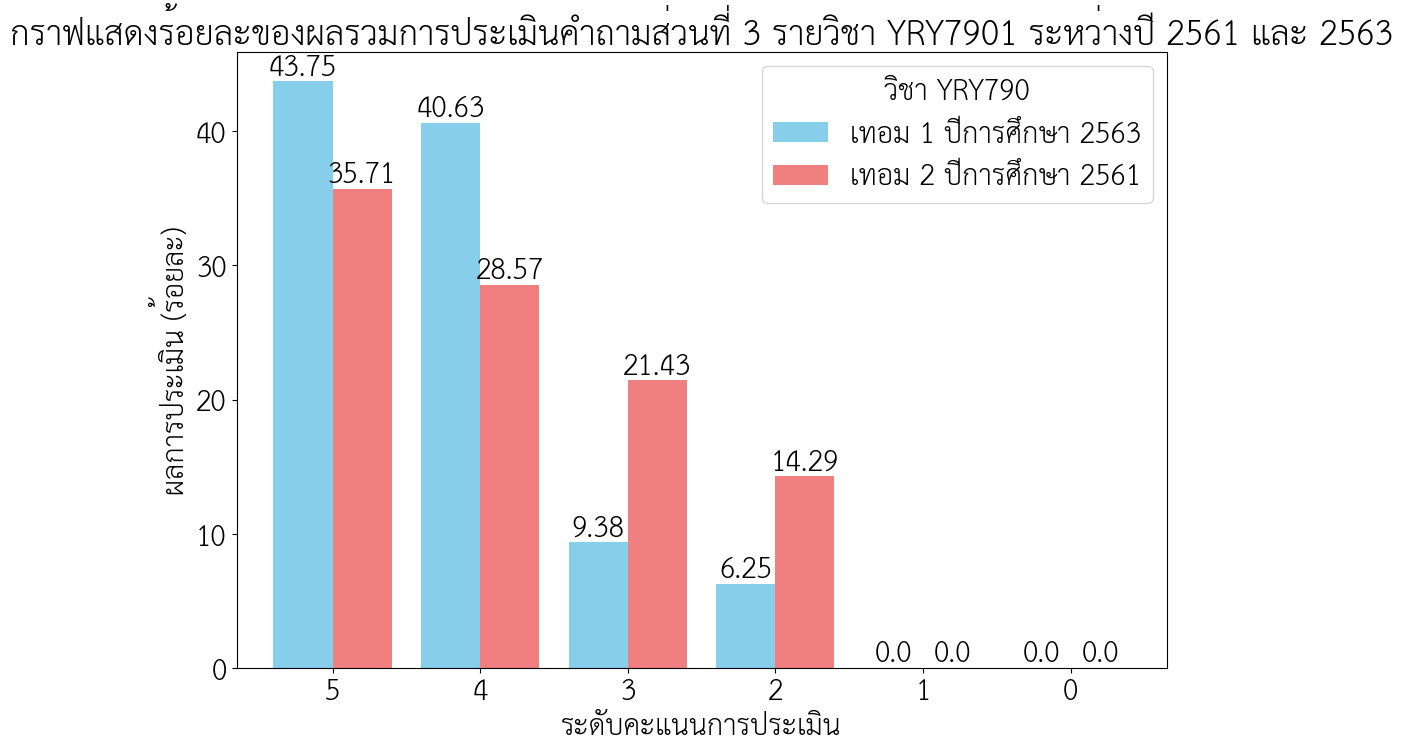

In [ ]:
result_dfy3.set_index('ปีการศึกษา', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['skyblue', 'lightcoral']
result_dfy3.T.plot(kind='bar', width=0.8, legend=False, color=colors, ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('กราฟแสดงร้อยละของผลรวมการประเมินคำถามส่วนที่ 3 รายวิชา YRY7901 ระหว่างปี 2561 และ 2563')
plt.xlabel('ระดับคะแนนการประเมิน')
plt.ylabel('ผลการประเมิน (ร้อยละ)')
plt.legend(title='วิชา YRY790')
plt.xticks(rotation=360)
plt.rcParams.update({'font.size': 20})
plt.show()



> จากกราฟจะเห็นว่าคำถามส่วนนี้คะแนนปี 2563 กลับมากกว่าปี 2561 อยู่ถึง 8.04% ส่วนนี้เป็นคำถามเกี่ยวกับโสตทัศนอุปกรณ์ซึ่งอาจจะไม่สำคัญมากนัก ถึงแม้คำถามส่วนนี้คะแนนปี 2563 จะมากกว่าปี 2561 แต่ก็ไม่สามารถทำให้คะแนนรวมทั้งหมดในการประเมินปี 2563 มากกว่าปี 2561 ได้

**สรุป** จากผลรวมทั้งหมดของการประเมินการเรียนการสอนในรายวิชา YRY790 ของปี 2561 และปี 2563 จะเห็นได้ว่าปี 2561 มีคะแนนการประเมินมากกว่าปี 2563 ซึ่งคำถามจะแบ่งเป็นสามส่วน คะแนนปี 2561 ส่วนมากจากคำถามส่วนที่ 1 และส่วนที่ 2 ซึ่งเป็นคำถามเกี่ยวกับการเรียนการสอนโดยตรง ส่วนคะแนนคำถามส่วนที่ 3 จะเทไปทางปี 2563 มากกว่า ดังนั้นสามารถสรุปได้ว่าการเรียนการสอนในปี 2561 ดีกว่า หรือทำให้นักศึกษามีความรู้ความเข้าใจมากกว่า ปี 2563



---


จากการทำกราฟมาทั้งหมดสรุปได้ว่า วิชา DRI970 ปี 2563 นั้นมีความพึงพอใจที่สูงจากเรื่องการเรียนการสอนจริง ๆ เพราะในวิชาอื่นของปี 2563 นักศึกษาไม่ได้ประเมินพึงพอใจมากกว่าปี 2561 ทุกวิชา